# Visualization of Cepstrum procedure in unvoiced signal

This script is done to analyse the procedure to estimate the pitch based on cepstrum coefficients.
First we are going to choose a frame to analyse.

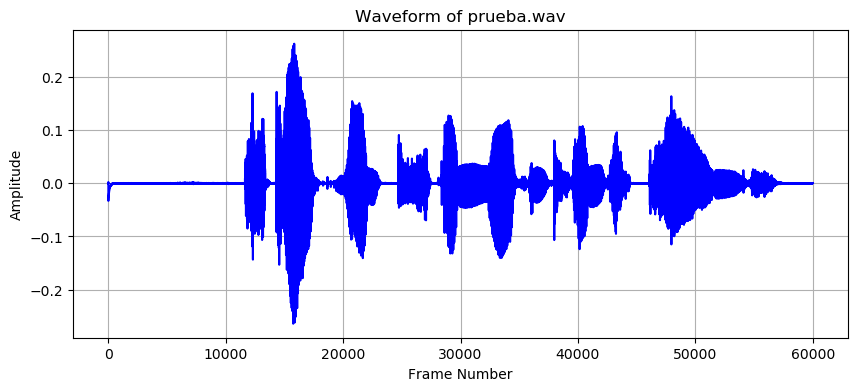

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

filename = "../../prueba.wav"
audio_data, sample_rate = sf.read(filename)

frame_numbers = np.arange(len(audio_data))

plt.figure(figsize=(10, 4))
plt.plot(frame_numbers, audio_data, color='b')
plt.title('Waveform of prueba.wav')
plt.xlabel('Frame Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

We are choosing the frame between 55000 and 55500.

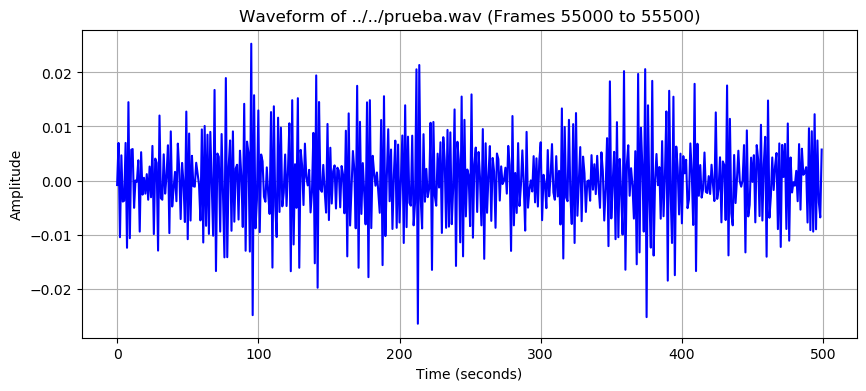

In [2]:
frame_length_ms = 25
frame_length_samples = int(frame_length_ms * sample_rate / 1000)

start_frame = 55000
end_frame = start_frame + frame_length_samples

start_index = start_frame
end_index = min(end_frame, len(audio_data))

audio_data_frame = audio_data[start_index:end_index]

plt.figure(figsize=(10, 4))
plt.plot(audio_data_frame, color='b')
plt.title('Waveform of {} (Frames {} to {})'.format(filename, start_frame, end_frame))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

We apply the hamming window.

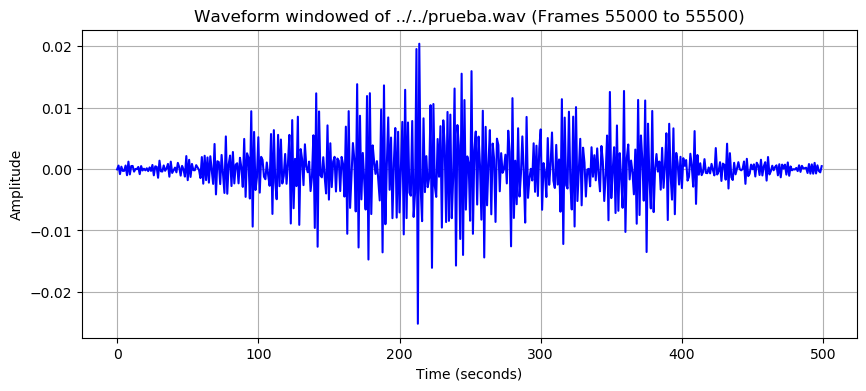

In [3]:
window_length = len(audio_data_frame)

hamming_window = np.hamming(window_length)

audio_data_frame_windowed = audio_data_frame * hamming_window

plt.figure(figsize=(10, 4))
plt.plot(audio_data_frame_windowed, color='b')
plt.title('Waveform windowed of {} (Frames {} to {})'.format(filename, start_frame, end_frame))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Compute the FFT of this signal. First we need to fill the signal with zeros. (zero padding)

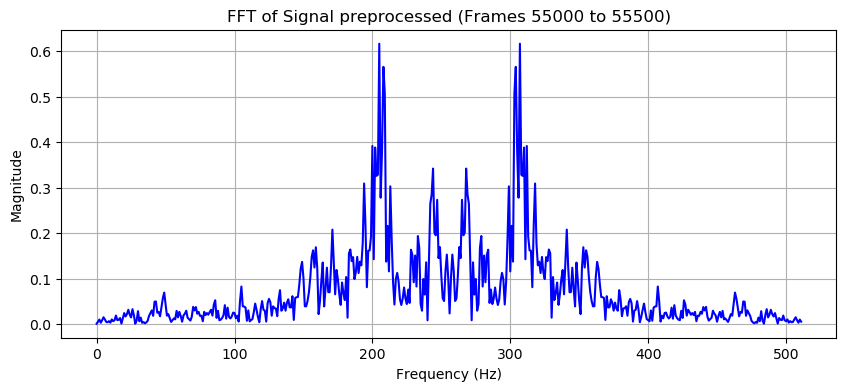

In [4]:
next_pow_of_2 = int(2 ** np.ceil(np.log2(len(audio_data_frame_windowed))))
audio_processed = np.pad(audio_data_frame_windowed, (0, next_pow_of_2 - len(audio_data_frame_windowed)), mode='constant')

fft = np.fft.fft(audio_processed)

plt.figure(figsize=(10, 4))
plt.plot(np.abs(fft), color='b')
plt.title('FFT of Signal preprocessed (Frames {} to {})'.format(start_frame, end_frame))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

We take the logarithm of the module of the signal.

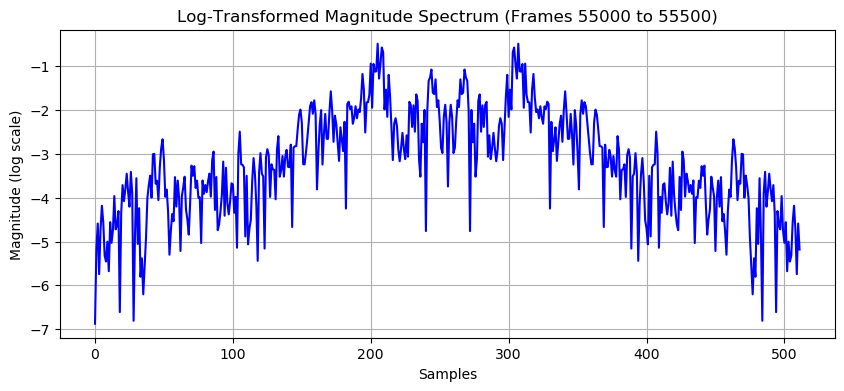

In [5]:
magnitude_spectrum = np.log(np.abs(fft))

plt.figure(figsize=(10, 4))
plt.plot(magnitude_spectrum, color='b')
plt.title('Log-Transformed Magnitude Spectrum (Frames {} to {})'.format(start_frame, end_frame))
plt.xlabel('Samples')
plt.ylabel('Magnitude (log scale)')
plt.grid(True)
plt.show()

Lastly, we compute the inverse fourier transform.

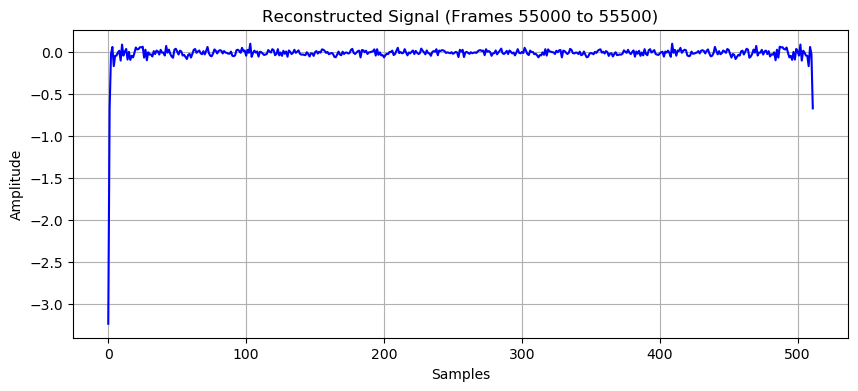

In [6]:
reconstructed_signal = np.fft.ifft(magnitude_spectrum)

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_signal.real, color='b')
plt.title('Reconstructed Signal (Frames {} to {})'.format(start_frame, end_frame))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Zoom the signal to see its caracteristics.

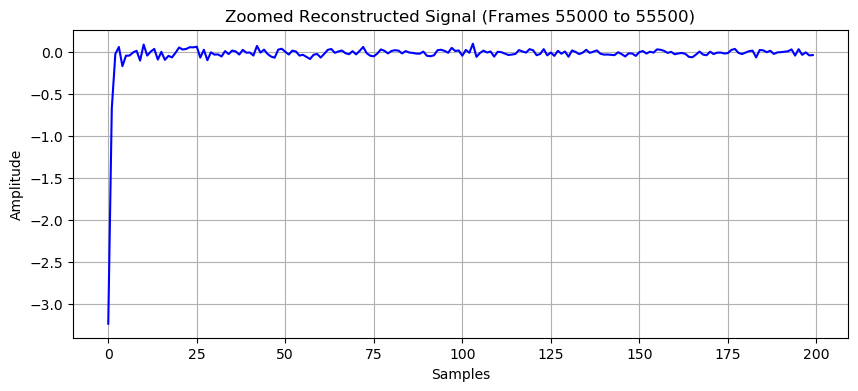

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(reconstructed_signal.real[:200], color='b')
plt.title('Zoomed Reconstructed Signal (Frames {} to {})'.format(start_frame, end_frame))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

We can see that there aren't visible maximums. Now make a comparison of the two results.

In [9]:
file_path = 'voiced.txt'

reconstructed_signal_voiced = []

with open(file_path, 'r') as file:
    for line in file:
        value = float(line.strip())
        reconstructed_signal_voiced.append(value)

reconstructed_signal_voiced = np.array(reconstructed_signal_voiced)

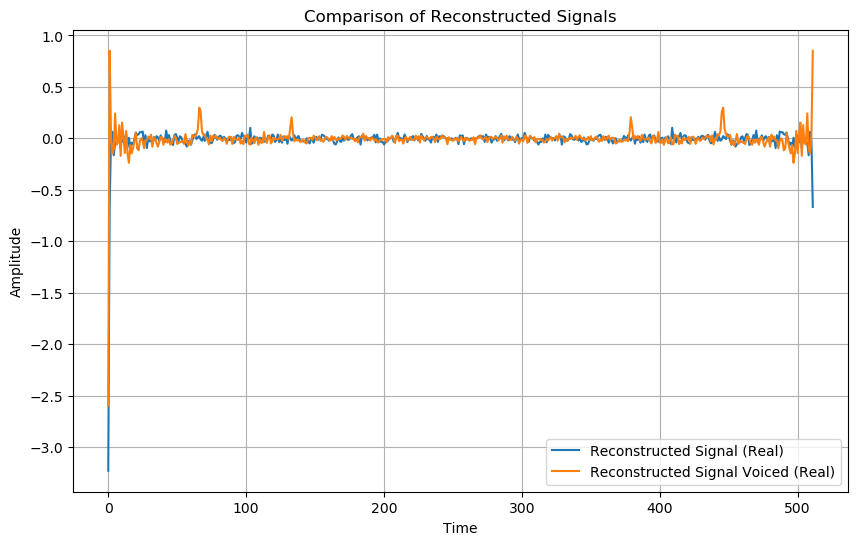

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(reconstructed_signal.real, label='Reconstructed Signal')
plt.plot(reconstructed_signal_voiced.real, label='Reconstructed Signal Voiced')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Comparison of Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.show()

Clearly we see that we could differentiate voiced and unvoiced with a threshold in the maximums of the cepstrum coefficients.